# Machine Learning with Time Series and Simple Linear Regression
Following a guided example from the textbook "Intro to Python for Computer Science and Data Science" by Paul and Harvey Deitel, that will introduce machine learning and simple linear regression. 
 Author: Laura Dooley
 GitHub Repo: https://github.com/Ldooley32/datafun-07-ml
 

In [36]:
import jupyter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics as stats
import scipy as sp
from scipy import stats
import statsmodels as sm
import logging
import sklearn
from sklearn import model_selection 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  

## Part 1 Chart a Straight Line

The file ave_hi_nyc_jan_1895-2018.csv will be used in the guided project example. The example graph will compare Celsius and Fahrenheit. The file only contains Fahrenheit temperaturee. The example begins with converting the temp. to Celsius from 0-100 degrees in 10 degreee interval. When points are graphed, a straight line will be produced. 

In [37]:
c = lambda f: 5/9 * (f-32)

In [38]:
temps = [(f, c(f)) for f in range (0, 101, 10)]

The date will be placed in a data frame and designed to plot the points and connect the line.

In [39]:
temps_df = pd.DataFrame(temps, columns = ['Fahrenheit', 'Celsius'])

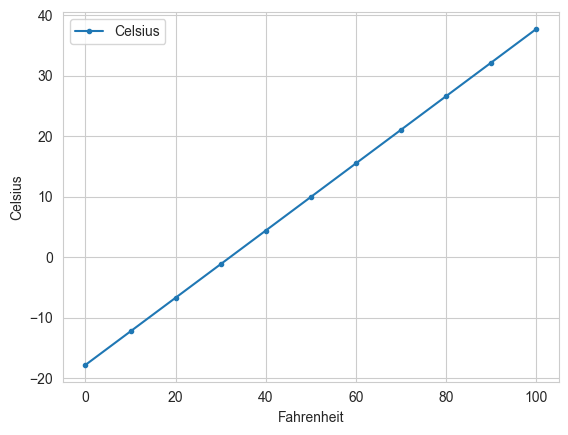

In [40]:
axes = temps_df.plot(x = 'Fahrenheit', y = 'Celsius', style = '.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 Prediction

### Section 1 - Data Acquisition
The project begins with loading the data. 

In [41]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

Once the dataset is available, displaying the first and last few rows will give a sense of what the dataset contains. 

In [42]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [43]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

To make the data more readable, the columns should be relabeled to identify the temperature column easliy. 

In [44]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [45]:
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


The data was collect in January of each year. To make the graph more readable the data is adjusted to use the year only.

In [46]:
nyc.Date.dtype

dtype('int64')

In [47]:
nyc.Date = nyc.Date.floordiv(100)

In [48]:
nyc.head()

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


### Section 4 - Descriptive Statistics

describe() is used to calculate quick statistics on a dataset.

In [49]:
nyc.Temperature.describe()

count    124.000000
mean      37.595161
std        4.539848
min       26.100000
25%       34.575000
50%       37.600000
75%       40.600000
max       47.600000
Name: Temperature, dtype: float64

### Section 5 - Build the Model

linregress() will calculate the line slope and where the line intercepts the y axis.

In [50]:
linear_regression = stats.linregress(x = nyc.Date, y = nyc.Temperature)

In [51]:
linear_regression.slope

0.014771361132966163

In [52]:
linear_regression.intercept 

8.694993233674289

### Section 6 - Predict

When the slop and the y intercept is determined prediction of temperatures can be determined with the line equations y=mx+b.

In [53]:
linear_regression.slope * 2019 + linear_regression.intercept 

38.51837136113297

In [54]:
linear_regression.slope * 1890 + linear_regression.intercept 

36.612865774980335

In [55]:
linear_regression.slope * 2024 + linear_regression.intercept 

38.5922281667978

### Section 7 - Visualizations

The regplot function is used to create a scatter plot with a regresion line. The data has a wide spread by scaling the graph to a customized range the temperature's linear relationship is easier to see. 

In [56]:
sns.set_style('whitegrid')

(10.0, 70.0)

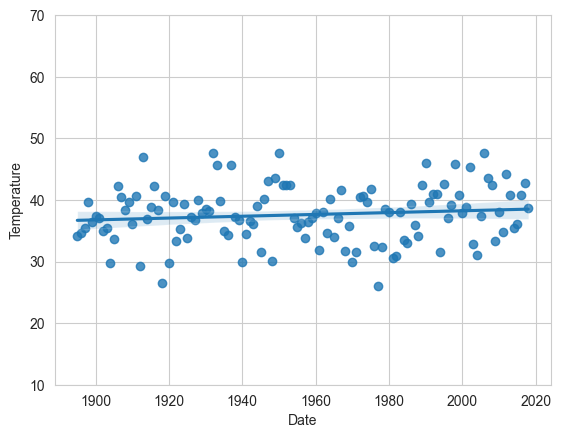

In [57]:
axes = sns.regplot(x = nyc.Date, y = nyc.Temperature)
axes.set_ylim(10, 70)

In [58]:
## Part 3 Prediction

### Section 1 - Build the Model

The guided project will use an estimated linear regresssion From the library Sklearn. To begine the one dimensional arrays will need to be converted to a 2 dimensional array. The data is split into a training and testing sets. The transformation used the shape method. 

In [59]:
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1,1), nyc.Temperature.values, random_state=11)


In [60]:
X_train.shape

(93, 1)

In [61]:
X_test.shape

(31, 1)

In [62]:
linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

The estimator model iteratively adjusts the slope and intercept to minimize the sum of the squared distances between the data points and the line, resulting in the best fit regression line. 

In [63]:
linear_regression.coef_

array([0.01939167])

In [64]:
linear_regression.intercept_

-0.30779820252658396

###  Section 2 - Test the Model

X-test is used to test the predictions throught the data against the expected values. 

In [65]:
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p: .2f}, expected {e: .2f}')
    

predicted:  37.86, expected  31.70
predicted:  38.69, expected  34.80
predicted:  37.00, expected  39.40
predicted:  37.25, expected  45.70
predicted:  38.05, expected  32.30
predicted:  37.64, expected  33.80
predicted:  36.94, expected  39.70


### Section 3 - Predict 

Using the coefificent and intercept values temperatures are predicted for previous and future temperatures.

In [66]:
predict= (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

predict(2019)


array([38.84399018])

In [67]:
predict(1890)

array([36.34246432])

In [68]:
predict (2024)

array([38.94094855])

In [69]:
### Section 4 - Visualizations

A scaterplot will use dataset to produce a graph with an estimated regression line. The graph will use a customized scale to display a better regression line. 

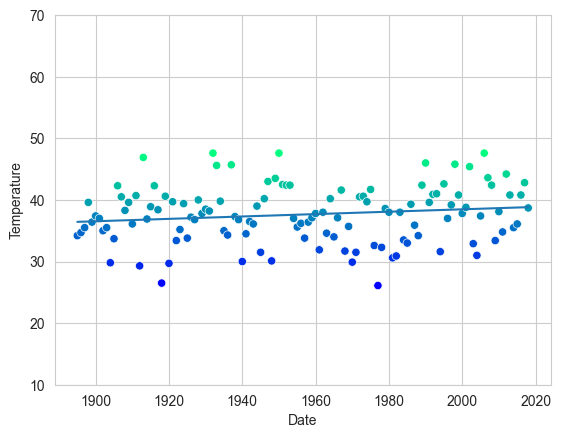

In [70]:
axes = sns.scatterplot(data=nyc, x ='Date', y='Temperature', hue='Temperature', palette = 'winter', legend =False)
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
y = predict(x)
axes.set_ylim(10, 70)
line = plt.plot(x, y)

## Conclusion: 
Using the SciPy library the line equations was determined to be y = .000148x+8.695. The line equation that was calculated using estimated date adjusted by sklearn is y = .0194x - 0.3078. Even though the line equations are very different from each other, each line prodcues similar predictions. This is a excellent test. There are times when data would need to be estimated. It is good to see the estimator is realitively close to actual . 